In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
mod2 = pd.read_csv("mod1_encoded_sem2.csv")
mod2.shape

(1241, 21)

In [31]:
mod2 = mod2.drop('DEPENDENTS', axis=1)
mod2 = mod2.drop('YEAR', axis=1)
mod2 = mod2.drop('REGION', axis=1) 
mod2 = mod2.drop('GENDER', axis=1) 
mod2 = mod2.drop('SCHOOL', axis=1) 
mod2 = mod2.drop('LEARNING STYLE', axis=1) 

In [32]:
mod2.head()

,PROGRAM,RACE,RELIGION,STATE,INCOME,SPM ADDMATH,SPM PHY,SPM CHEM,SPM BIO,SEM1 CGPA,SEM1 MATH,SEM1 PHY,SEM1 CHEM,SEM1 BIO,SEM2 CGPA
0,1,3,2,1,6,6,5,5,3,1,2,1,1,2,1
1,1,3,2,1,1,5,4,6,5,1,1,4,2,5,1
2,1,3,2,1,7,7,2,4,5,1,4,1,3,3,1
3,1,3,2,8,2,5,3,6,4,2,3,5,4,1,2
4,1,3,2,1,3,3,4,6,5,1,1,5,3,2,1


## TRAIN TEST SPLIT

In [33]:
## CREATE TRAIN TEST SPLIT TO AVOID OVERFITTING
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(mod2.drop(labels=['SEM2 CGPA'],axis=1),
                                                 mod2['SEM2 CGPA'],test_size=0.2,random_state=0)

In [34]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 992 entries, 552 to 684
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PROGRAM      992 non-null    int64
 1   RACE         992 non-null    int64
 2   RELIGION     992 non-null    int64
 3   STATE        992 non-null    int64
 4   INCOME       992 non-null    int64
 5   SPM ADDMATH  992 non-null    int64
 6   SPM PHY      992 non-null    int64
 7   SPM CHEM     992 non-null    int64
 8   SPM BIO      992 non-null    int64
 9   SEM1 CGPA    992 non-null    int64
 10  SEM1 MATH    992 non-null    int64
 11  SEM1 PHY     992 non-null    int64
 12  SEM1 CHEM    992 non-null    int64
 13  SEM1 BIO     992 non-null    int64
dtypes: int64(14)
memory usage: 116.2 KB


In [35]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249 entries, 1031 to 963
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PROGRAM      249 non-null    int64
 1   RACE         249 non-null    int64
 2   RELIGION     249 non-null    int64
 3   STATE        249 non-null    int64
 4   INCOME       249 non-null    int64
 5   SPM ADDMATH  249 non-null    int64
 6   SPM PHY      249 non-null    int64
 7   SPM CHEM     249 non-null    int64
 8   SPM BIO      249 non-null    int64
 9   SEM1 CGPA    249 non-null    int64
 10  SEM1 MATH    249 non-null    int64
 11  SEM1 PHY     249 non-null    int64
 12  SEM1 CHEM    249 non-null    int64
 13  SEM1 BIO     249 non-null    int64
dtypes: int64(14)
memory usage: 29.2 KB


In [36]:
#distribution in training set
y_train.value_counts(normalize=True)

0    0.611895
1    0.313508
2    0.067540
3    0.006048
4    0.001008
Name: SEM2 CGPA, dtype: float64

In [37]:
#distribution in testing set
y_test.value_counts(normalize=True)

0    0.626506
1    0.309237
2    0.060241
3    0.004016
Name: SEM2 CGPA, dtype: float64

In [38]:
#shape of training set
X_train.shape, y_train.shape

((992, 14), (992,))

In [39]:
#shape of testing set
X_test.shape, y_test.shape

((249, 14), (249,))

## DECISION TREE MODELLING

In [63]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

import warnings # to hide unnecesary warning
warnings.filterwarnings('ignore')                                                            
%matplotlib inline

In [64]:
dt_mod =  DecisionTreeClassifier (random_state=0, criterion = 'entropy')
dt_mod.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [65]:
dt_mod.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [66]:
from sklearn.model_selection import GridSearchCV

params = [{'criterion':['gini', 'entropy'],
          "max_features":["auto","log2","sqrt",None],
          "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90],
          "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
          "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10]}]
          
           
grid_search = GridSearchCV(estimator=dt_mod,param_grid=params,scoring='accuracy',cv=10,n_jobs=-1)

grid_search = grid_search.fit(X_train,y_train)

print(grid_search.best_params_)

{'criterion': 'entropy', 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.1}


In [67]:
#checking the training score
dt_mod.score(X_train, y_train)

1.0

In [68]:
#checking the testing score
dt_mod.score(X_test, y_test)

0.7791164658634538

In [69]:
#Predicting values on test set
y_predicted = dt_mod.predict(X_test)
y_predicted

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2,
       0, 0, 0, 0, 2, 1, 2, 1, 1, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 1, 1, 2, 0, 2, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 2, 1, 1, 0, 0, 0, 1, 0,
       2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0,
       0, 4, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2,
       1, 1, 1, 2, 0, 1, 1], dtype=int64)

In [70]:
#Predicting values on test set - alternative
dt_mod.predict_proba(X_test)

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [71]:
#Checking test accuracy
accuracy_score(y_test, y_predicted) * 100

77.91164658634538

In [72]:
#Confusion Matrix
confusion_matrix(y_test, y_predicted)

array([[134,  22,   0,   0,   0],
       [ 16,  50,  10,   0,   1],
       [  0,   5,  10,   0,   0],
       [  0,   1,   0,   0,   0],
       [  0,   0,   0,   0,   0]], dtype=int64)

In [73]:
print ('DT Results : Target SEM2 CGPA')
print(classification_report(y_test, y_predicted, target_names=["<=1.99","<=2.49","<=2.99", "<=3.49","=>3.50"]))

DT Results : Target SEM2 CGPA
              precision    recall  f1-score   support

      <=1.99       0.89      0.86      0.88       156
      <=2.49       0.64      0.65      0.65        77
      <=2.99       0.50      0.67      0.57        15
      <=3.49       0.00      0.00      0.00         1
      =>3.50       0.00      0.00      0.00         0

    accuracy                           0.78       249
   macro avg       0.41      0.43      0.42       249
weighted avg       0.79      0.78      0.78       249



## PLOTTING THE TREE

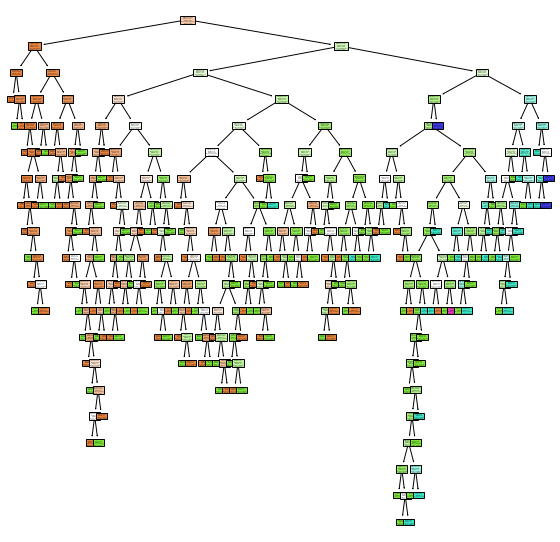

In [74]:
#Plotting the Tree
from sklearn import tree
fn = ["program",   
      "race",
      "religion",
      "state",  
      "income",
      "SPM addmath",
      "SPM phy",
      "SPM chem",
      "SPM bio",
      "SEM1 CGPA",
      "SEM1 math",
      "SEM1 phy",
      "SEM1 chem",
      "SEM1 bio"]
cn = ["<=1.99","<=2.49","<=2.99", "<=3.49","=>3.50"]
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=70)
tree.plot_tree(dt_mod, filled = True, feature_names = fn, class_names = cn);
fig.savefig('imagename.png')